C:\Users\PRINCE\AppData\Local\Temp\ipykernel_15320\36078293.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


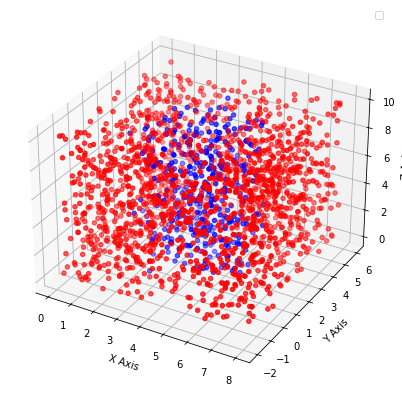

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize 
import numpy as np
import pandas as pd
import math
df=pd.read_csv("dataset_3D.csv")
x = df['x'].values
y = df['y'].values
z = df['z'].values
m = df['label'].values
fig = plt.figure(figsize=(10, 7))

# Create a 3D Axis
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[m==0],y[m==0],z[m==0], color='red')
ax.scatter(x[m==1],y[m==1], z[m==1],color='blue')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.legend()
plt.show()





In [2]:
import numpy as np

# Create the missing alias manually
np.bool8 = np.bool_

# Now import plotly
import plotly.express as px
import pandas as pd
import plotly.express as px
import pandas as pd

# 1. Load the Dataset
df = pd.read_csv("dataset_3D.csv")

# 2. Ensure the label is treated as a category (string) 
# This prevents Plotly from using a continuous color bar and ensures discrete legend items
df['label'] = df['label'].astype(str)

# 3. Create the Interactive 3D Plot
fig = px.scatter_3d(
    df,
    x='x',
    y='y',
    z='z',
    color='label',  # Distinguish points by this column
    color_discrete_map={'0': 'red', '1': 'blue'}, # Map your specific colors
    title="Interactive 3D Scatter Plot",
    opacity=0.6,    # Make points slightly see-through (helps with 3D depth)
)

# 4. Refine the visual (Optional: make dots smaller for better visibility)
fig.update_traces(marker=dict(size=3))

# 5. Show the plot
fig.show(renderer="browser")

In [3]:
def binary_cross_loss(params, x,y, m): 
    delta = 10**(-5)
    a,b,c,d,e,f,g = params 
    Z=a*x**2+b*y**2+c*z**2+d*x+e*y+f*z+g
    m_hat=1/(1+np.exp(Z))
    mse=-(m*np.log10(m_hat + delta)+(1-m)*np.log10(1-m_hat+delta))
    return np.mean(mse)

initial_guess = [0,0,0,0,0,0,0] 
result_mse = minimize(binary_cross_loss, initial_guess, args=(x, y,m)) 
a,b,c,d,e,f,g = result_mse.x 


from tabulate import tabulate

# Assuming result_mse.x contains your optimized values
params_values = result_mse.x
params_names = ['a', 'b', 'c', 'd', 'e', 'f', 'g']

# Combine names and values into a list of rows
table_data = zip(params_names, params_values)

print(tabulate(table_data, headers=['Parameter', 'Optimized Value'], tablefmt='grid'))

+-------------+-------------------+
| Parameter   |   Optimized Value |
+=============+===================+
| a           |          1.13388  |
+-------------+-------------------+
| b           |          1.16646  |
+-------------+-------------------+
| c           |         -0.026176 |
+-------------+-------------------+
| d           |         -9.07937  |
+-------------+-------------------+
| e           |         -4.42827  |
+-------------+-------------------+
| f           |          0.261121 |
+-------------+-------------------+
| g           |         17.1014   |
+-------------+-------------------+


1. Look at the optimized value for β3,β6 (the coefficient for z and z2). Is it significantly different
from zero?
2. Yes these coefficients are near to zero.

3. Why does the model assign such a value to z? What does this imply about the
influence of ”height” on this specific classification task?
4. It is because the circle is not changing with z (z is constant) therefore there is no influence due to height.

5. Identify the hidden geometric shape by analyzing the remaining non-zero coefficients
6. It is cylinder

In [7]:
import plotly.graph_objects as go
import numpy as np

# 1. Create a dense 3D grid
X, Y, Z = np.mgrid[x.min():x.max():40j, 
                   y.min():y.max():40j, 
                   z.min():z.max():40j]

# 2. Define the Function based on your optimized params
# f(x,y,z) = ax^2 + by^2 + cz^2 + dx + ey + fz + g
values = a*X**2 + b*Y**2 + c*Z**2 + d*X + e*Y + f*Z + g

# 3. Create the Plotly Figure
fig = go.Figure()

# Add the Scatter Points (Data)
fig.add_trace(go.Scatter3d(x=x[m==0], y=y[m==0], z=z[m==0],
                           mode='markers', marker=dict(color='red', size=2, opacity=0), name='Class 0'))
fig.add_trace(go.Scatter3d(x=x[m==1], y=y[m==1], z=z[m==1],mode='markers', marker=dict(color='blue', size=2, opacity=0), name='Class 1'))
#                            mode='markers', marker=dict(color='blue', size=2, opacity=0.5), name='Class 1'))

# Add the Isosurface (The Boundary)
fig.add_trace(go.Isosurface(
    x=X.flatten(),
    y=Y.flatten(),
    z=Z.flatten(),
    value=values.flatten(),
    isomin=0,
    isomax=0,
    surface_count=1,
    colorscale='Greens',
    showscale=False,
    caps=dict(x_show=False, y_show=False),
    opacity=0.8,
    name='Decision Boundary'
))

fig.update_layout(title="3D Decision Boundary via Marching Cubes",
                  scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))
fig.show(renderer="iframe")